<h1 style="text-align:center;">LAB 2</h1>
<h1 style="text-align:center;">Frequency Domain Filtering</h1>
<h3 style="text-align:left; color:blue;">Student Name:</h3>
<h3 style="text-align:left; color:blue;">Student ID:</h3>

<h2 style="text-align:left; color:black;">Introduction</h2>

Frequency Domain Filters are used for smoothing and sharpening of image by removal of high or low frequency components.</br>
Frequency filters process an image in the frequency domain. The image is Fourier transformed, multiplied with the filter function and then re-transformed into the spatial domain. Attenuating high frequencies results in a smoother image in the spatial domain, attenuating low frequencies enhances the edges.

<h2 style="text-align:left; color:black;">Objective</h2>

In this lab, you'll apply some frequency domain filtering techniques to an image to smooth an image. This is done through:</br>
* Computing DFT of an image.
* Creating a frequency domain filter.
* Applying the filter to the image.
* Computing the inverse of DFT of the filtered image.

<h2 style="text-align:left; color:black;">Instructions</h2>

In [8]:
# Import the needed libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
# Read an image from disk
image = cv2.imread(filename="lena_gray.png", flags=cv2.IMREAD_GRAYSCALE)

In [10]:
# Apply DFT on the image then shift the origin to the center of the image
def DFT(image):
    # Get the Fourier transform
        # Convert the image to float32, without changing it an error occurs stating that the src type should be float32 or float64
        # Add cv2.DFT_COMPLEX_OUTPUT to get the real and imaginary output in fft_image[:,:,0] and fft_image[:,:,1]
    fft_image = cv2.dft(src=np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    # Shift the origin from top left to the center
    shifted_fft = np.fft.fftshift(fft_image)
    return shifted_fft
shifted_fft = DFT(image)
print (shifted_fft.shape)

(512, 512, 2)


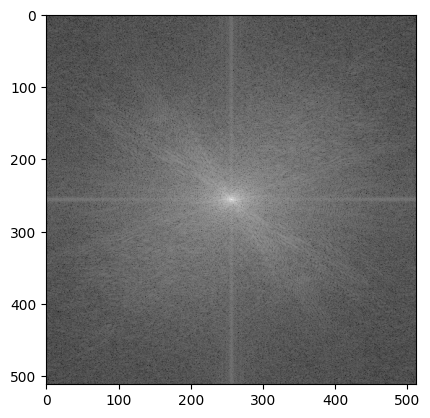

In [11]:
# Display DFT result
def display_DFT(shifted_fft):
    # Convert to log scale
    magnitude_spectrum = np.log(1 + cv2.magnitude(shifted_fft[:, :, 0], shifted_fft[:, :, 1]))
    # Normalize the image to range from 0 to 255 before displaying it
    normalized_magnitude = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return normalized_magnitude
normalized_dft = display_DFT(shifted_fft)
plt.imshow(normalized_dft, cmap="gray")

(512, 512, 2)


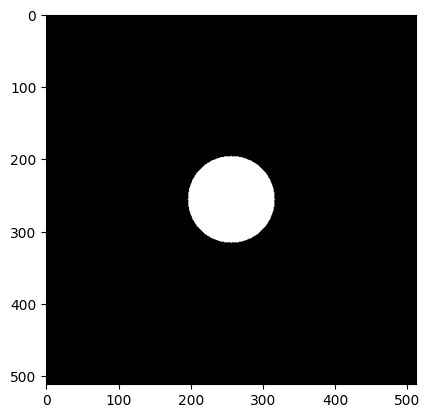

In [12]:
# Create an ideal LPF
rows = shifted_fft.shape[0]
cols = shifted_fft.shape[1]
temp = np.zeros(shape=shifted_fft.shape, dtype=np.uint8)
print(temp.shape)
cv2.circle(img=temp, center=(rows // 2, cols // 2), radius= 60, color=(1,1), thickness=-1) # Negative thickness value means that it is filled
lpf = temp                          # for hpf, try 1 - temp
hpf = 1-temp
plt.imshow(hpf[:,:,0] * 255, cmap="gray")
plt.imshow(lpf[:,:,0] * 255, cmap="gray")

In [13]:
# Apply the filter to the image
shifted_filtered_fft_lpf = lpf * shifted_fft
shifted_filtered_fft_hpf = hpf * shifted_fft

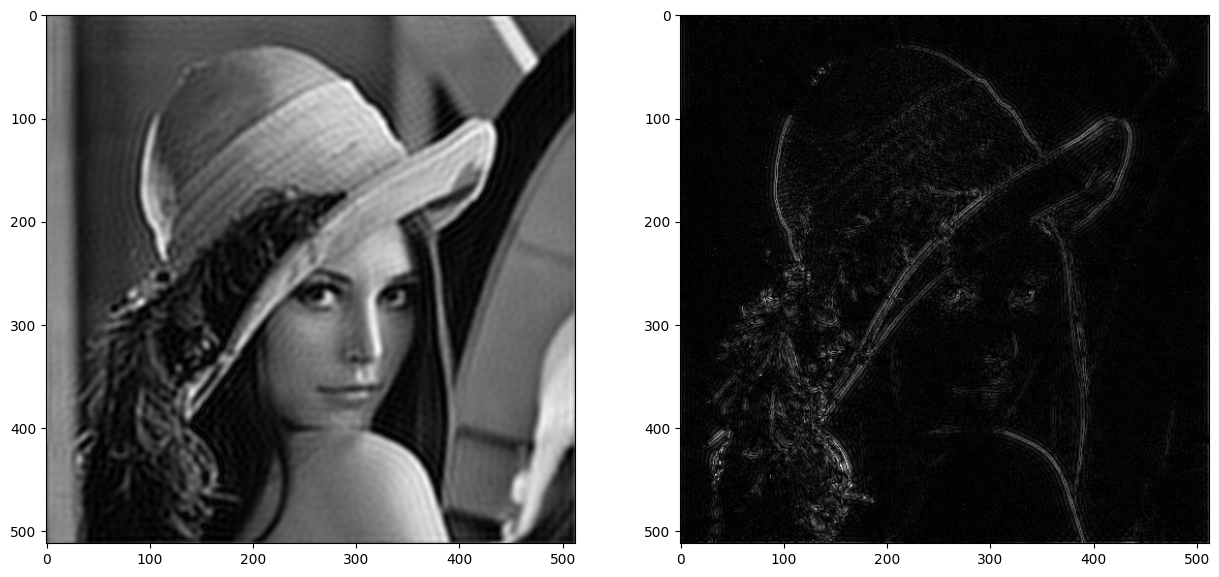

In [15]:
# Compute the inverse DFT of the filtered image and display it
def IDFT(shifted_fft):
    # Get the image back using inverse DFT
    unshifted_ifft = np.fft.ifftshift(shifted_fft)
    idft_image = cv2.idft(src=unshifted_ifft)
    restored_image = cv2.magnitude(idft_image[:, :, 0], idft_image[:, :, 1])
    # Normalize the image to range from 0 to 255 before displaying it
    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return restored_image

restored_image_lpf = IDFT(shifted_filtered_fft_lpf)
restored_image_hpf = IDFT(shifted_filtered_fft_hpf)
plt.subplots(1,2,figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(restored_image_lpf, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(restored_image_hpf, cmap="gray")